# GRIP- The Sparks Foundation
## Data Science And Business Analytics Intern
### Task 2- Predicting Using Unsupervised ML
#### Author- Sharvari Paithankar

In [3]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

In [4]:
data = pd.read_csv('c:/Iris.csv',index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


#### To know the number of rows and columns present in the data, we use the following code

In [5]:
data.shape

(150, 5)

#### To check the number of null values present in the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


##### As we can see, there are no null values present in the given dataset. 

#### Plotting the pair plot to visualize all the attributes's dependency on each other.

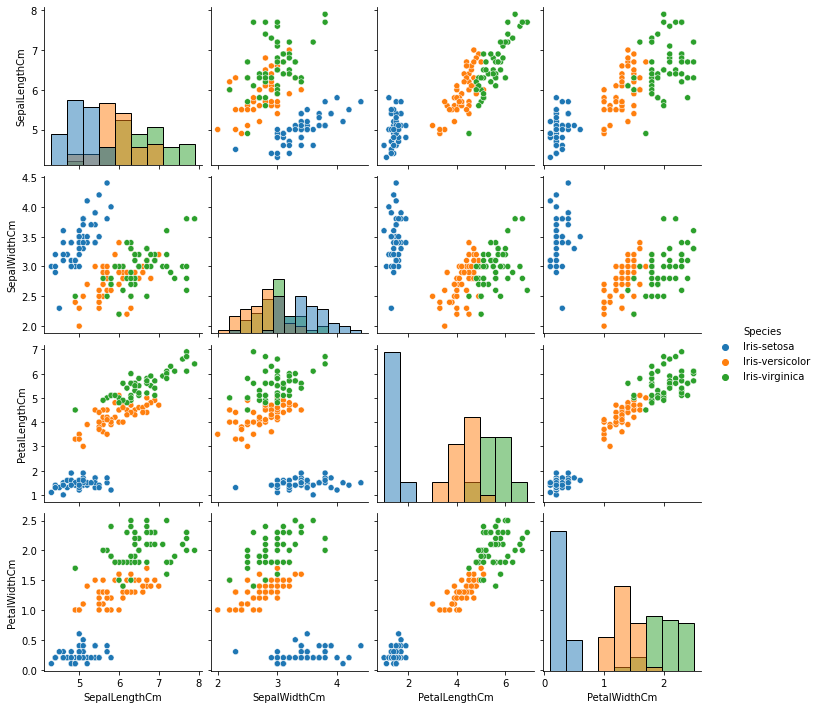

In [7]:
sns.pairplot(data, hue= 'Species',diag_kind="hist")

##### We can see that one of the species that is Iris-setosa makes a distinctive cluster and the remaining two species are overlapping a bit on each other.

<AxesSubplot:>

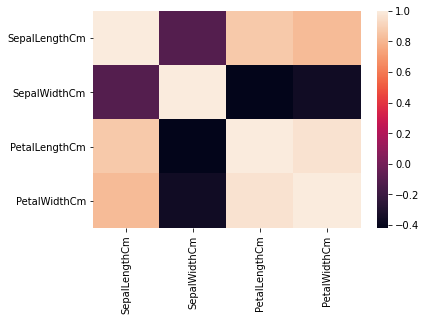

In [8]:
#correlation matrix
sns.heatmap(data.corr())

##### As we can see, PetalLength is highly related to PetalWidth
##### and SepalLength is not related to SepalWidth

In [9]:
#defining 'x'
x=data.iloc[:,[0,1,2,3]].values

#### Problem Statement: Predict the optimum number of clusters.
##### For this we are going to use the method known as 'Elbow' method, which is used to determine the value of 'K' to perform K-Means Clustering Algorithm.

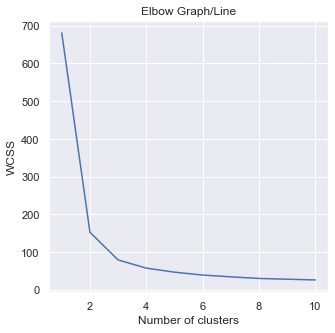

In [17]:
# Optimum number of clusters for k-means
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',
                 max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting a line graph

plt.plot(range(1,11),wcss)
plt.title('Elbow Graph/Line')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')#within the cluster sum of square
plt.show()
sns.set(rc={'figure.figsize':(5,5)})

#### The optimum number of clusters is where the elbow occurs. 
##### From the above graph, we consider the number of clusters as 3.

In [18]:
#Applying kmeans to the dataset
kmeans= KMeans(n_clusters=3, init='k-means++',
             max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

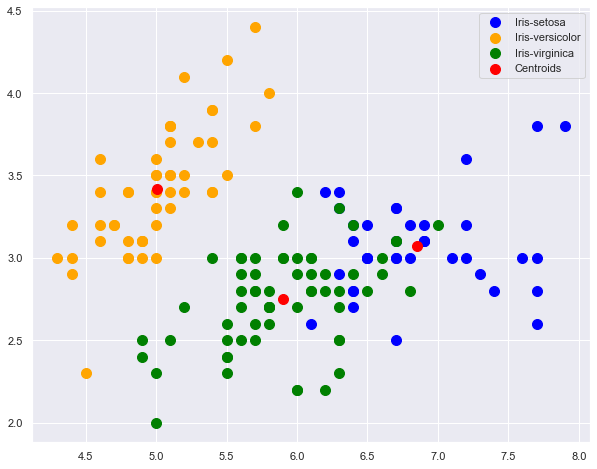

In [30]:
#Visualizing clusters
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c='Blue', label='Iris-setosa')

plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c='Orange', label='Iris-versicolor')

plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c='green', label='Iris-virginica')

#For centroids of the cluster

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='red',label='Centroids')

plt.legend()

sns.set(rc={'figure.figsize':(10,8)})